<a href="https://colab.research.google.com/github/Carolina-Silva/algoritmoLogica/blob/main/microcephalyBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link com a base de dados:
https://github.com/BuzzFeedNews/zika-data/blob/master/data/parsed/brazil/brazil-microcephaly-2016-01-30-table-1.csv

In [71]:
# importações de bibliotecas necessarias.
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import math
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [72]:
# Caminho e nome do arquivo
arquivo = '/content/drive/MyDrive/Colab Notebooks/arquivos/microcephalyBrazil.csv'

In [84]:
# Guardar no dataframe (df)
df = pd.read_csv(arquivo)
print(df)

    no                state  cases_under_investigation  cases_confirmed  \
0    1              Alagoas                        104               15   
1    2                Bahia                        508               99   
2    3                Ceará                        234                7   
3    4             Maranhão                        132                0   
4    5              Paraíba                        460               37   
5    6           Pernambuco                       1159              153   
6    7                Piauí                         66               27   
7    8  Rio Grande do Norte                        154               63   
8    9              Sergipe                        178                0   
9   10       Espírito Santo                         52                0   
10  11         Minas Gerais                         21                0   
11  12       Rio de Janeiro                        196                2   
12  13            São Pau

In [75]:
# Colunas presentes no documento.
colunas = df.columns.tolist()
print(colunas)

['no', 'state', 'cases_under_investigation', 'cases_confirmed', 'cases_discarded', 'cases_reported_total']


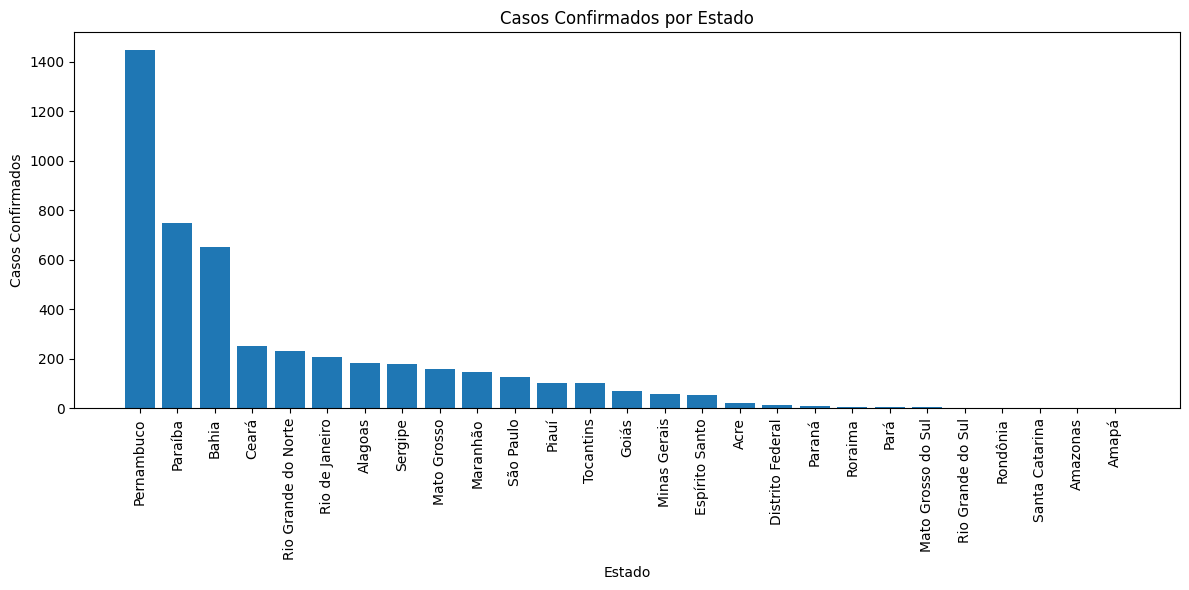

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

dados_agrupados = df.groupby('state')['cases_reported_total'].sum().reset_index()
dados_agrupados = dados_agrupados.sort_values(by='cases_reported_total', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(dados_agrupados['state'], dados_agrupados['cases_reported_total'])
plt.xlabel('Estado')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados por Estado')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


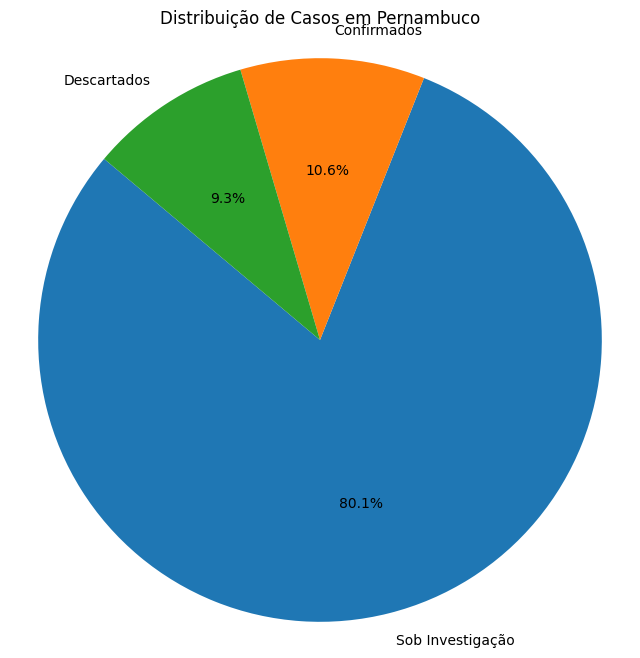

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha lido os dados do CSV em um DataFrame chamado 'df'
# Certifique-se de que seu DataFrame tenha as colunas 'state', 'cases_under_investigation', 'cases_confirmed' e 'cases_discarded'

# Filtre o DataFrame para obter apenas os dados de Pernambuco
pernambuco_data = df[df['state'] == 'Pernambuco']

# Extraia os valores dos casos sob investigação, casos confirmados e casos descartados
casos_sob_investigacao = pernambuco_data['cases_under_investigation'].values[0]
casos_confirmados = pernambuco_data['cases_confirmed'].values[0]
casos_descartados = pernambuco_data['cases_discarded'].values[0]

# Crie uma lista de rótulos para os tipos de casos
tipos_de_casos = ['Sob Investigação', 'Confirmados', 'Descartados']

# Crie uma lista de valores para cada tipo de caso
valores = [casos_sob_investigacao, casos_confirmados, casos_descartados]

# Crie o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=tipos_de_casos, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Casos em Pernambuco')

# Exiba o gráfico de pizza
plt.axis('equal')  # Garante que o gráfico seja exibido como um círculo
plt.show()


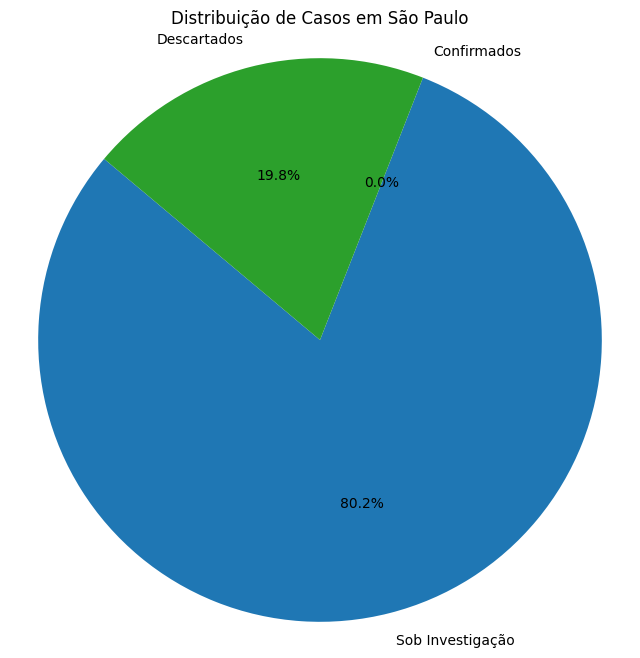

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha lido os dados do CSV em um DataFrame chamado 'df'
# Certifique-se de que seu DataFrame tenha as colunas 'state', 'cases_under_investigation', 'cases_confirmed' e 'cases_discarded'

# Filtre o DataFrame para obter apenas os dados de Pernambuco
pernambuco_data = df[df['state'] == 'São Paulo']

# Extraia os valores dos casos sob investigação, casos confirmados e casos descartados
casos_sob_investigacao = pernambuco_data['cases_under_investigation'].values[0]
casos_confirmados = pernambuco_data['cases_confirmed'].values[0]
casos_descartados = pernambuco_data['cases_discarded'].values[0]

# Crie uma lista de rótulos para os tipos de casos
tipos_de_casos = ['Sob Investigação', 'Confirmados', 'Descartados']

# Crie uma lista de valores para cada tipo de caso
valores = [casos_sob_investigacao, casos_confirmados, casos_descartados]

# Crie o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=tipos_de_casos, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Casos em São Paulo')

# Exiba o gráfico de pizza
plt.axis('equal')  # Garante que o gráfico seja exibido como um círculo
plt.show()


tabela de frequencia

In [85]:
df_cases_reported_total = pd.read_csv(arquivo, usecols=['cases_reported_total'])
print(df_cases_reported_total)
print(df_cases_reported_total.max())
print(df_cases_reported_total.min())

    cases_reported_total
0                    185
1                    653
2                    251
3                    148
4                    750
5                   1447
6                    103
7                    232
8                    178
9                     52
10                    58
11                   208
12                   126
13                    20
14                     0
15                     0
16                     6
17                     1
18                     7
19                   101
20                    15
21                    69
22                   157
23                     4
24                    10
25                     1
26                     1
cases_reported_total    1447
dtype: int64
cases_reported_total    0
dtype: int64


In [86]:
# Amplitude
at = math.ceil(df_cases_reported_total.max() - df_cases_reported_total.min())
print(at)

1447


In [87]:
# Calculando as classes
k = math.trunc(math.sqrt(len(df)))
h = at/k
h = math.ceil(h)

print("Quantidade de classes " + str(k))
print("Intervalo das classes " + str(h))

Quantidade de classes 5
Intervalo das classes 290


In [88]:
# Criação da tabela de Frequencia

frequencias = []
limites_classes = []

menor = round(df.min(),1)

menor_amp = round(menor+h,1)

valor = int(menor)
while valor < int(df.max()):
    limites_classes.append(valor)
    frequencias.append('{} - {}'.format(valor,valor+h))
    valor += h
limites_classes.append(valor)

# Calculando os pontos médios (xi) com base nos limites das classes
pontos_medios = [(limite_inf + limite_sup) / 2 for limite_inf, limite_sup in zip(limites_classes, limites_classes[1:])]

# Calcular a frequência das classes
frequencia_classes = pd.cut(df['cases_reported_total'], bins=limites_classes, include_lowest=True, right=False).value_counts().sort_index()

# Calcular a frequência relativa das classes
frequencia_relativa_classes = frequencia_classes / len(df)

# Calcular a porcentagem
porcentagem = round(frequencia_relativa_classes * 100, 0)

# tabela de distribuição de frequências
tabela_frequencias = pd.DataFrame({
    'Frequência Absoluta': frequencia_classes,
    'Ponto Médio': pontos_medios,
    'Frequência Relativa': frequencia_relativa_classes,
    'Porcentagem': porcentagem
})
tabela_frequencias.index.name = 'Classes'

print (tabela_frequencias)


TypeError: ignored

In [89]:
media = df['cases_reported_total'].mean()
print("Média: {:.2f}".format(media))


moda = df['cases_reported_total'].mode().values[0]
print("Moda: {:.2f}".format(moda))


mediana = df['cases_reported_total'].median()
print("Mediana: {:.2f}".format(mediana))

Média: 177.15
Moda: 1.00
Mediana: 69.00


Média Ponderada x̄ = (Σ(xi * fi)) / Σfi

In [91]:
# calcula média ponderada seguindo a formula.
soma_produtos = sum(ponto_medio * freq for ponto_medio, freq in zip(pontos_medios, frequencia_classes))
total_frequencia_absoluta = sum(frequencia_classes)
media_ponderada = soma_produtos / total_frequencia_absoluta

print("A média ponderada é(aproximadamente):", media_ponderada)

A média ponderada é(aproximadamente): 75.76
